In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the train and test files
train = pd.read_csv('Sberbank2/train.csv')
test = pd.read_csv('Sberbank2/test.csv')
train.drop(['id'], axis=1)
test.drop(['id'], axis=1)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,3/20/2013,51,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,4,6,0,0,4,1,5014900
1,12/12/2014,45,27.0,1.0,12.0,1.0,1973.0,2.0,6.0,3.0,...,46,6,2,23,50,0,11,110,6,8150000
2,5/15/2014,45,17.0,10.0,17.0,1.0,2008.0,1.0,10.0,NaN,...,27,5,0,27,44,0,12,117,12,3461416
3,5/27/2014,52,30.0,1.0,12.0,1.0,1979.0,2.0,9.0,2.0,...,22,6,1,4,16,0,0,62,3,8100000
4,2/11/2014,58,37.0,3.0,5.0,2.0,1967.0,3.0,5.0,2.0,...,11,8,0,8,13,0,2,46,1,7583000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6027,11/5/2014,35,18.0,7.0,9.0,2.0,1973.0,1.0,6.0,2.0,...,258,87,18,91,176,1,70,175,12,7600000
6028,12/16/2014,38,38.0,10.0,17.0,1.0,2016.0,1.0,10.0,1.0,...,2,1,0,0,10,0,0,0,0,3840769
6029,4/11/2014,44,31.0,4.0,9.0,5.0,1965.0,2.0,5.0,3.0,...,7,2,0,7,27,0,7,63,13,6400000
6030,3/13/2013,38,20.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6,2,0,3,10,0,1,17,2,5500000


In [3]:
train.shape,test.shape

((8022, 292), (6032, 292))

In [4]:
train = train[0:6000]
test = test[0:6000]

In [5]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,20292,6/27/2014,29,NaN,8.0,12.0,6.0,NaN,1.0,1.0,...,0,0,0,0,6,0,0,0,0,2199436
1,20814,7/12/2014,46,29.0,5.0,14.0,1.0,1969.0,2.0,6.0,...,29,1,1,8,37,2,4,79,13,7600000
2,21675,8/20/2014,54,32.0,14.0,16.0,1.0,1978.0,2.0,9.0,...,11,3,0,11,10,0,1,45,4,8900000
3,21641,8/19/2014,84,0.0,8.0,0.0,1.0,0.0,3.0,1.0,...,2,2,0,1,12,1,0,7,0,9377280
4,1329,2/25/2012,64,45.0,10.0,NaN,NaN,NaN,NaN,NaN,...,40,5,0,34,58,0,17,128,12,7600000


In [6]:
# train.fillna(train.mode(), inplace=True)
# test.fillna(test.mode(), inplace=True)
# train.fillna(train.mean(), inplace=True)
# test.fillna(test.mean(), inplace=True)

In [7]:
## Label    encoding
for i in train.columns:
    if train[i].dtype == 'object':
          train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
          train[i] = train[i].fillna(np.mean(train[i]))

for i in test.columns:
    if test[i].dtype == 'object':
          test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
          test[i] = test[i].fillna(np.mean(test[i]))

number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
        train[i] = number.fit_transform(train[i].astype('str'))
        train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
        test[i] = number.fit_transform(test[i].astype('str'))
        test[i] = test[i].astype('object')

In [8]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,20292,808,29,33.617053,8.0,12.000000,6.000000,1872.760797,1.000000,1.000000,...,0,0,0,0,6,0,0,0,0,2199436
1,20814,848,46,29.000000,5.0,14.000000,1.000000,1969.000000,2.000000,6.000000,...,29,1,1,8,37,2,4,79,13,7600000
2,21675,942,54,32.000000,14.0,16.000000,1.000000,1978.000000,2.000000,9.000000,...,11,3,0,11,10,0,1,45,4,8900000
3,21641,935,84,0.000000,8.0,0.000000,1.000000,0.000000,3.000000,1.000000,...,2,2,0,1,12,1,0,7,0,9377280
4,1329,422,64,45.000000,10.0,12.513337,1.857177,1872.760797,1.911736,5.974782,...,40,5,0,34,58,0,17,128,12,7600000


In [9]:
y_train = train['price_doc']
y_test = test['price_doc']
train.drop('price_doc',axis=1)
test.drop('price_doc',axis=1)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,6638,493,51,34.582447,4.0,12.665777,1.826214,1887.074274,1.894417,7.072816,...,6,1,0,0,4,6,0,0,4,1
1,26338,278,45,27.000000,1.0,12.000000,1.000000,1973.000000,2.000000,6.000000,...,62,46,6,2,23,50,0,11,110,6
2,18447,667,45,17.000000,10.0,17.000000,1.000000,2008.000000,1.000000,10.000000,...,63,27,5,0,27,44,0,12,117,12
3,18945,708,52,30.000000,1.0,12.000000,1.000000,1979.000000,2.000000,9.000000,...,27,22,6,1,4,16,0,0,62,3
4,14836,369,58,37.000000,3.0,5.000000,2.000000,1967.000000,3.000000,5.000000,...,20,11,8,0,8,13,0,2,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,9736,984,39,34.582447,6.0,12.665777,1.826214,1887.074274,1.894417,7.072816,...,4,1,0,0,2,3,0,0,6,1
5996,13637,1,32,20.000000,5.0,5.000000,1.000000,1961.000000,1.000000,5.000000,...,27,6,2,0,7,24,0,6,60,11
5997,22237,1051,74,39.000000,4.0,14.000000,2.000000,1976.000000,3.000000,6.000000,...,80,52,9,0,28,60,0,16,108,7
5998,16160,483,57,54.000000,17.0,17.000000,6.000000,2015.000000,2.000000,0.000000,...,18,11,2,1,5,4,0,1,32,5


In [10]:
# Creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('price_doc',axis=1) #droping target variable

In [11]:
## Taking sample from training and test data
training = training.sample(6000, random_state=2)
testing = test.sample(6000, random_state=1)

In [12]:
## Combining random samples
combine = training.append(testing)
y = combine['origin']
combine.drop('origin',axis=1,inplace=True)

In [13]:
## Modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combine.columns:
    score = cross_val_score(model,pd.DataFrame(combine[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

build_year 0.8480208055555556
state 0.8493090555555556
hospital_beds_raion 0.864198888888889
cafe_sum_500_min_price_avg 0.8450258888888889
cafe_sum_500_max_price_avg 0.8400453055555556
cafe_avg_price_500 0.8441261666666667


c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)


In [14]:
print(drop_list)

['build_year', 'state', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500']


In [15]:
# Dropping the origin with all the features
training = train.drop('origin',axis=1)
testing = test.drop('origin',axis=1)
# Using a basic random forest model with all the features
rf = RandomForestRegressor(n_estimators=200, max_depth=6,max_features=10)
rf.fit(training,training['price_doc'])
pred = rf.predict(testing)
columns = ['price_doc']

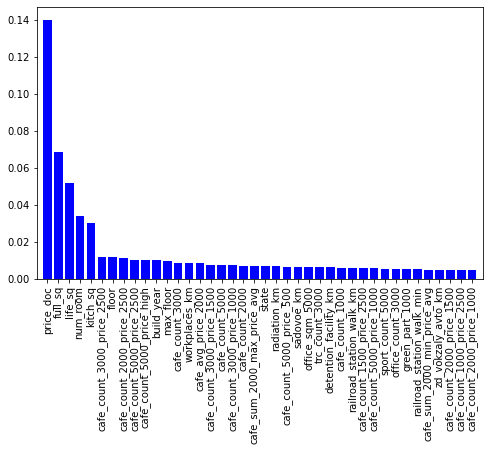

In [16]:
# plotting importances features
features = training.columns.values
imp = rf.feature_importances_
indices = np.argsort(imp)[::-1][:40]
#plot
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), imp[indices], color = 'b', align='center')
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()

In [17]:
#Detect importance feature in the shift data to avoid removing it from the training data
importance = features[indices]
x = set(drop_list)
y = set(importance)
z = x.intersection(y)
dropable = x - z
#Drpable Shift Feature 
print(dropable)

{'hospital_beds_raion', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500'}


In [18]:
#After dropping shift Classification performance Test ACC
new_train = training.drop(dropable, axis=1)
new_test = testing.drop(dropable, axis=1)
rf = DecisionTreeClassifier()
rf.fit(new_train ,y_train)
pred = rf.predict(new_test)
# print(pred)
print(accuracy_score(y_test, pred))

0.5433333333333333


train2 shape: (8400, 288) test2 shape: (3600, 288)
0.7947222222222222


c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


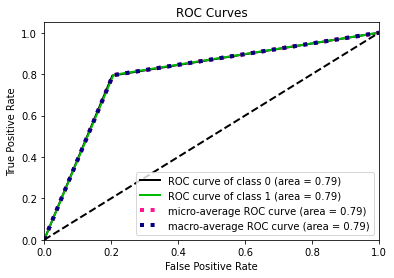

AUC score:  0.7947


In [19]:
#After dropping shift ROC Score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
roc_train = training.drop(dropable, axis=1)
roc_test = testing.drop(dropable, axis=1)
roc_train['is_test'] = 0
roc_test['is_test'] = 1
df = pd.concat([roc_train, roc_test], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']
X_train, xt, yta, yt = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))
y_test_score = rfc.predict_proba(xt)
skplt.metrics.plot_roc_curve(yt, y_test_score)
plt.show()
print('AUC score: ', round(roc_auc_score(y_true=yt, y_score=y_test_score[:,1]), 4))

In [20]:
#Before dropping shift Classification performance Test ACC
new_train = training
new_test = testing
rf = DecisionTreeClassifier()
rf.fit(new_train ,y_train)
pred = rf.predict(new_test)
# print(pred)
print(accuracy_score(y_test, pred))

0.5386666666666666


train2 shape: (8400, 292) test2 shape: (3600, 292)
0.8980555555555556


c:\users\mrtay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


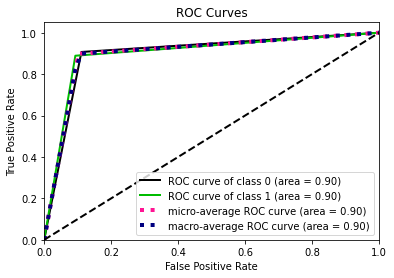

AUC score:  0.8979


In [21]:
#Before dropping shift ROC Score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
roc_train = training
roc_test = testing
roc_train['is_test'] = 0
roc_test['is_test'] = 1
df = pd.concat([roc_train, roc_test], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']
X_train, xt, yta, yt = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))
y_test_score = rfc.predict_proba(xt)
skplt.metrics.plot_roc_curve(yt, y_test_score)
plt.show()
print('AUC score: ', round(roc_auc_score(y_true=yt, y_score=y_test_score[:,1]), 4))

In [22]:
# Training accuracy before droping
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
X_train, xt, yta, yt = train_test_split(training, y_train, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))

train2 shape: (4200, 293) test2 shape: (1800, 293)
0.49277777777777776


In [23]:
# Training accuracy after droping
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
X_train, xt, yta, yt = train_test_split(new_train, y_train, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', xt.shape)

rfc = DecisionTreeClassifier()
rfc.fit(X_train, yta)
y_pred = rfc.predict(xt)
print(accuracy_score(yt, y_pred))

train2 shape: (4200, 293) test2 shape: (1800, 293)
0.49833333333333335
